In [7]:
from nutils import *
import numpy, unittest

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import collections

In [14]:
nelems = 10
degree = 1
tol  = 1e-5
ndims = 1
L = 1.0

In [15]:
domain, geom = mesh.rectilinear([numpy.linspace(0,1,nelems+1)]*ndims)

In [16]:
# prepare unit domain
domain, geom = mesh.rectilinear([numpy.linspace(0, L, nelems+1)])

# geometry and basis
ns = function.Namespace()
ns.x = geom
ns.basis = domain.basis('discont', degree=degree)

# solution vector
ns.u = 'basis_n ?lhs_n'

# material parameters
ns.V = 2           # advective velocity

#  dg penaly parameters
ns.C = 1.0       # penalty enforcing C^0 continuity

# analytical solution and forcing vector
ns.pi  = numpy.pi
ns.g  = 'cos( 2 pi x_0 )'
ns.dg = '-(2 pi) sin( 2 pi x_0 )'
ns.ddg = '-(2 pi)^2 cos( 2 pi x_0 )'

ns.f   = 'V dg'

In [17]:
# construct residual and inertia vector
res = domain.integral('-basis_n,0 V u - basis_n f' @ ns, geometry=ns.x, degree=degree*2)

# interface C^0 continuity 
res += domain.interfaces.integral('-[basis_n] n_0 V ({u} - .5 C [u] n_0)' @ ns, geometry=ns.x, degree=degree*2)

# weak boundary imposition
res += domain.boundary.integral('basis_n n_0 V (0.5 (g + u) - .5 C (g - u) n_0)' @ ns, geometry=ns.x, degree=degree*2)

solve > solver returned with residual 3e-16


(-2, 2)

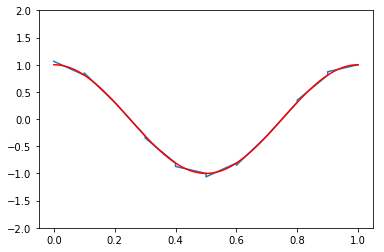

In [18]:
# find lhs such that res == 0 and substitute this lhs in the namespace
lhs = solver.solve_linear('lhs', res)
ns = ns(lhs=lhs)

# plot solution
bezier = domain.sample('bezier', 9)
x, u = bezier.eval([ns.x, ns.u])
x, g = bezier.eval([ns.x, ns.g])
plt.plot(x, u)
plt.plot(x, g,'r')
plt.ylim(-2,2)